## DETECCIÓN DE OUTLIERS

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt

In [2]:
# Carga de datos.
df = pd.read_csv("outliers.csv")
print(df)

            a         b
0    0.149014 -0.041479
1    0.194307  0.456909
2   -0.070246 -0.070241
3    0.473764  0.230230
4   -0.140842  0.162768
..        ...       ...
195 -5.114441  0.646251
196  5.631630  0.277174
197  1.552784  2.348984
198 -0.545507  1.530697
199  1.011772  4.813896

[200 rows x 2 columns]


### 1) EllipticEnvelope()

In [3]:
# Entrenamos un objeto de tipo EllipticEnvelope
algorithm = EllipticEnvelope(support_fraction=None, contamination=0.25, random_state=42)
outlier_method = algorithm.fit(df)

# Aplicamos el método de detección de outliers entrenado sobre nuesto dataset
df_outliers = outlier_method.predict(df)
print(df_outliers)

# Determinar la posición de los outliers
pos_outliers = np.where(df_outliers==-1)[0]
print('\nOutliers en la posición: \n', pos_outliers)

# Determinar el número de outliers
print('\nNúmero de outliers: \n', len(pos_outliers))

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]

Outliers en la posición: 
 [150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199]

Número de outliers: 
 50


In [5]:
# Definimos una función que, dado un determinado "df" y un "algorithm", devuelva la matriz y la posición de outliers
def find_outliers(df, algorithm):
    
    # Entrenamos el algoritmo
    outlier_method = algorithm.fit(df)

    # Aplicar el método de detección de outliers
    df_outliers = outlier_method.predict(df)

    # Extraer posición outliers
    pos_outliers = np.where(df_outliers==-1)[0]

    return df_outliers, pos_outliers

df_outliers, pos_outliers = find_outliers(df, algorithm)
print(df_outliers)
print(pos_outliers)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]
[150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199]


### 2) Otros métodos similares

In [15]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

IF = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
OC_SVM = OneClassSVM(kernel='poly', degree=1, gamma='auto')
LOF = LocalOutlierFactor(n_neighbors=100, contamination='auto', novelty=True)

df_outliers_IF, pos_outliers_IF = find_outliers(df, IF)
print("IF")
print(df_outliers_IF)
print(len(pos_outliers_IF))

df_outliers_SVM, pos_outliers_SVM = find_outliers(df, OC_SVM)
print("\nOC_SVM")
print(df_outliers_SVM)
print(len(pos_outliers_SVM))

df_outliers_LOF, pos_outliers_LOF = find_outliers(df, LOF)
print("\nLOF")
print(df_outliers_LOF)
print(len(pos_outliers_LOF))

IF
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1]
48

OC_SVM
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  

c:\Users\pepel\Desktop\Formación\Máster\Contenido\Asignaturas\Aprendizaje Supervisado\Scripts\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [16]:
# Eliminamos los outliers
new_df_IF = df[df_outliers_IF==1]
print("IF")
print(new_df_IF)

new_df_SVM = df[df_outliers_SVM==1]
print("\nOC_SVM")
print(new_df_SVM)

new_df_LOF = df[df_outliers_LOF==1]
print("\nLOF")
print(new_df_LOF)

IF
            a         b
0    0.149014 -0.041479
1    0.194307  0.456909
2   -0.070246 -0.070241
3    0.473764  0.230230
4   -0.140842  0.162768
..        ...       ...
147  0.107105 -0.207873
148  0.269880  0.092190
149  0.243859  0.188889
164  1.582047 -0.618654
198 -0.545507  1.530697

[152 rows x 2 columns]

OC_SVM
            a         b
0    0.149014 -0.041479
1    0.194307  0.456909
2   -0.070246 -0.070241
3    0.473764  0.230230
4   -0.140842  0.162768
..        ...       ...
187 -4.589685  1.790524
192 -5.854146  5.638546
193 -5.482081  4.693717
195 -5.114441  0.646251
198 -0.545507  1.530697

[175 rows x 2 columns]

LOF
            a         b
0    0.149014 -0.041479
1    0.194307  0.456909
2   -0.070246 -0.070241
3    0.473764  0.230230
4   -0.140842  0.162768
..        ...       ...
145 -0.062437 -0.147900
146 -0.176809  0.254881
147  0.107105 -0.207873
148  0.269880  0.092190
149  0.243859  0.188889

[147 rows x 2 columns]


### 3) Box plot

limite inferior:  -1.0853060827395105
limite superior:  1.0119554520872196
Posición de outliers:  [150 153 154 157 159 160 162 165 168 169 171 172 174 175 177 178 181 184
 185 186 187 190 191 192 193 195 151 152 155 156 161 163 164 166 167 173
 176 179 180 182 188 189 196 197]
Número de outliers:  44


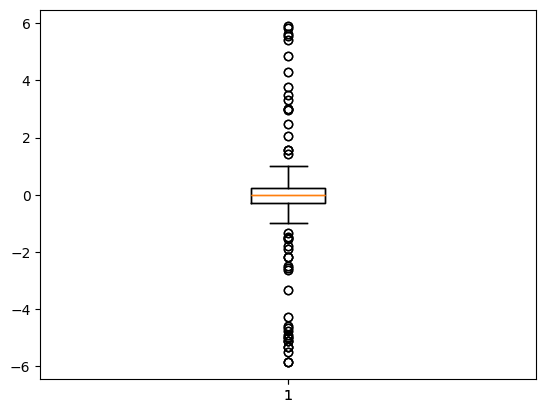

In [21]:
# Seleccionamos el atributo que vamos a medir
a = df['a']

# Seleccionamos los umbrales a partir de los cuales vamos a considerar outliers
Q1 = stats.scoreatpercentile(a, 25)
# Q2 = stats.scoreatpercentile(a, 50)
Q3 = stats.scoreatpercentile(a, 75)
RIC = Q3 - Q1
li = Q1 - 1.5*RIC #xmin
ls = Q3 + 1.5*RIC #xmax

# Observamos los límites inferior y superior
print('limite inferior: ', li)
print('limite superior: ', ls)

# Buscamos la posición de los outliers
pos_i = np.where(a<li)[0]
pos_s = np.where(a>ls)[0]
pos_outliers = np.concatenate((pos_i, pos_s))
print('Posición de outliers: ', pos_outliers)
print('Número de outliers: ', len(pos_outliers))

# Dibujamos el diagrama de caja y bigotes
prop = plt.boxplot(a)
plt.boxplot(a)
plt.show()

In [24]:
# Definir una función que, dada una columna de un dataframe, devuelva la posición de los outliers según el método box plot
def find_limits_BP(a):
    Q1 = stats.scoreatpercentile(a, 25)
    Q3 = stats.scoreatpercentile(a, 75)
    RIC = Q3 - Q1
    li = Q1 - 1.5*RIC
    ls = Q3 + 1.5*RIC

    pos_i = np.where(a<li)[0]
    pos_s = np.where(a>ls)[0]
    pos_outliers = np.concatenate((pos_i, pos_s))

    return pos_outliers


In [25]:
# Creamos un bucle for que estime los valores outliers de cada atributo
headers = df.columns # nombre de los atributos del CSV
pos_outliers = []
for i in range(len(headers)):
    variable = df[headers[i]] # Atributo 'x'
    pos_out = np.expand_dims(find_limits_BP(variable), axis=1) # Llamamos a la función que hemos creado
    pos_outliers.append(pos_out) # Lo añadimos en una lista

# Concatenamos todas las posiciones de outliers
po = np.vstack(pos_outliers)

# Vemos las posiciones de todos los outliers
pos_out = np.unique(po)
print('Posiciones de outliers: ', pos_out)

# Observamos el número de outliers
print('Numero de outliers: ', len(pos_out))

Posiciones de outliers:  [104 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199]
Numero de outliers:  51
